In [15]:
import pandas as pd

In [16]:
df = pd.read_excel(r'C:\Users\saqli\Desktop\DATA for Strawberry\COLOR_NEW.xlsx')

In [17]:
df = df.rename(columns={'Unnamed: 3':'Day 4', 'Unnamed: 4':'Day 6','Storage Time':'Day 2'})

In [18]:
df

,Parameters,Treatments,Day 2,Day 4,Day 6
0,NaN,NaN,2.00,4.00,6.00
1,L*,Control,17.54,14.79,10.22
2,NaN,1,16.47,13.98,10.76
3,NaN,2,17.43,15.55,10.52
4,NaN,3,17.29,15.48,10.67
5,NaN,4,18.69,15.73,10.71
6,NaN,5,17.58,15.58,10.22
7,NaN,6,16.75,15.33,10.07
8,NaN,7,17.33,15.68,11.12
9,NaN,8,17.49,15.52,11.08


In [19]:
df = df.drop(0)

In [20]:
df = df.drop(df.columns[0], axis=1)

In [21]:
df = df.reset_index(drop = True)

In [22]:
df

,Treatments,Day 2,Day 4,Day 6
0,Control,17.54,14.79,10.22
1,1,16.47,13.98,10.76
2,2,17.43,15.55,10.52
3,3,17.29,15.48,10.67
4,4,18.69,15.73,10.71
5,5,17.58,15.58,10.22
6,6,16.75,15.33,10.07
7,7,17.33,15.68,11.12
8,8,17.49,15.52,11.08
9,9,18.26,15.88,10.27


In [23]:
df_melt = df.melt(id_vars = ['Treatments'],
        value_vars = ['Day 2', 'Day 4', 'Day 6'],
        var_name= 'Days',
        value_name = 'Color')
print(df_melt.head(15))

   Treatments   Days  Color
0     Control  Day 2  17.54
1           1  Day 2  16.47
2           2  Day 2  17.43
3           3  Day 2  17.29
4           4  Day 2  18.69
5           5  Day 2  17.58
6           6  Day 2  16.75
7           7  Day 2  17.33
8           8  Day 2  17.49
9           9  Day 2  18.26
10         10  Day 2  17.55
11    Control  Day 4  14.79
12          1  Day 4  13.98
13          2  Day 4  15.55
14          3  Day 4  15.48


In [33]:
df = df_melt.pivot(index = 'Days', columns = 'Treatments', values = 'Color')
df

Treatments,1,2,3,4,5,6,7,8,9,10,Control
Days,,,,,,,,,,,
Day 2,16.47,17.43,17.29,18.69,17.58,16.75,17.33,17.49,18.26,17.55,17.54
Day 4,13.98,15.55,15.48,15.73,15.58,15.33,15.68,15.52,15.88,15.32,14.79
Day 6,10.76,10.52,10.67,10.71,10.22,10.07,11.12,11.08,10.27,10.36,10.22


In [25]:
day0 = pd.Series([19.05] * len(df.columns), index=df.columns)
df = pd.concat([pd.DataFrame([day0], index=['Day 0']), df])
df = df.sort_index()

Text(0.5, 1.0, 'Color L* ProfileOver Time by Treatment')

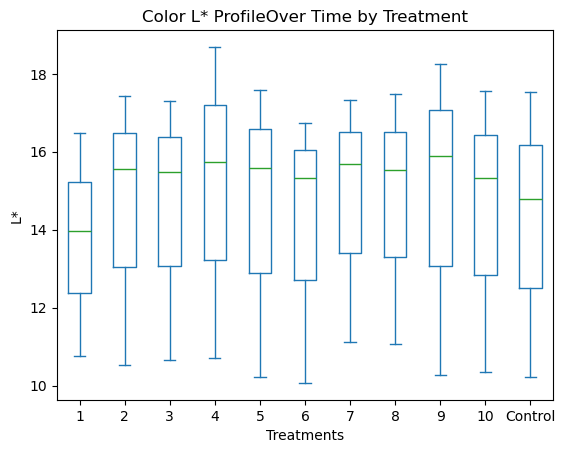

In [42]:
ax = df.plot(kind = 'box')
ax.set_ylabel('L*')
ax.set_xlabel('Treatments')
ax.set_title('Color L* ProfileOver Time by Treatment')

In [99]:
df

Treatments,1,2,3,4,5,6,7,8,9,10,Control
Days,,,,,,,,,,,
Day 2,16.47,17.43,17.29,18.69,17.58,16.75,17.33,17.49,18.26,17.55,17.54
Day 4,13.98,15.55,15.48,15.73,15.58,15.33,15.68,15.52,15.88,15.32,14.79
Day 6,10.76,10.52,10.67,10.71,10.22,10.07,11.12,11.08,10.27,10.36,10.22
